In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
# tf.enable_eager_execution()
from tensorflow.compat.v1 import graph_util
from tensorflow.python.keras import backend as K
#tf.compat.v1.enable_eager_execution()
#import time
# import cv2
#import glob

In [2]:
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.applications import VGG19,DenseNet169
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models

# from tensorflow.compat.v1 import graph_util
# from tensorflow.python.keras import backend as K
# tf.compat.v1.disable_eager_execution()
K.set_learning_phase(0)
from matplotlib.pyplot import imshow
from PIL import Image

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

model = load_model('mobilenet_saved_model')

D:\Anaconda root\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\backend.py:437: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


2.10.0
sys.version_info(major=3, minor=9, micro=18, releaselevel='final', serial=0)
matplotlib 3.8.0
numpy 1.26.0
pandas 2.1.1
sklearn 1.3.0
tensorflow 2.10.0
keras.api._v2.keras 2.10.0


In [7]:
#设置图片的高和宽，一次训练所选取的样本数，迭代次数
im_height = 224
im_width = 224
batch_size = 32
epochs = 100

In [8]:
image_path = "../../../../Data_2000_test/"  # 数据集路径
train_dir = image_path + "train" #训练集路径
validation_dir = image_path + "valid" #验证集路径
test_dir = image_path + "test" #验证集路径

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 定义训练集图像生成器
train_image_generator = ImageDataGenerator( rescale=1./255, # 归一化
                                            )

In [10]:
# 定义测试集图像生成器，并对图像进行预处理
test_image_generator = ImageDataGenerator(rescale=1./255) # 归一化

In [11]:
# 使用图像生成器从测试集test_dir中读取样本
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,#从测试集路径读取图片
                                                              batch_size=batch_size, #一次训练所选取的样本数
                                                              shuffle=False,  #不打乱标签
                                                              target_size=(im_height, im_width), #图片resize到224x224大小
                                                              #color_mode='grayscale',
                                                              class_mode='categorical') #one-hot编码

Found 252 images belonging to 4 classes.


In [12]:
import pickle

class History_trained_model(object):
    def __init__(self, history, epoch, params):
        self.history = history
        self.epoch = epoch
        self.params = params

with open('history_save', 'rb') as file:
    history = pickle.load(file)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


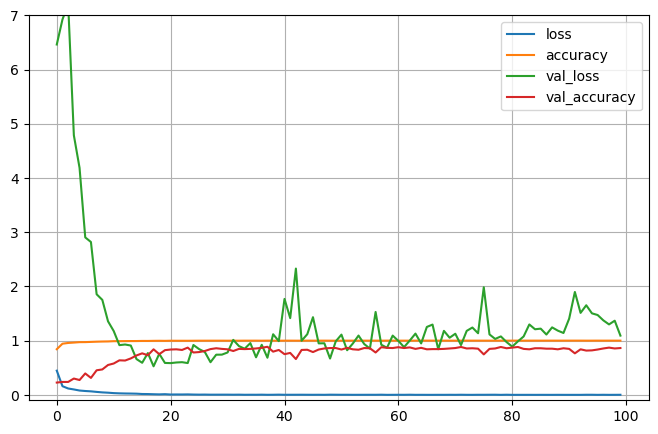

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
#画loss与acc变化曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(-0.1,7)
    plt.savefig("LOSS_ACC_1.eps", format='eps', dpi=300)
    plt.show()

plot_learning_curves(history)

In [14]:
# 记录训练集和验证集的准确率和损失值
history_dict = history.history
# print(history_dict)
train_loss = history_dict["loss"] #训练集损失值
train_accuracy = history_dict["accuracy"] #训练集准确率
val_loss = history_dict["val_loss"] #验证集损失值
val_accuracy = history_dict["val_accuracy"] #验证集准确率

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


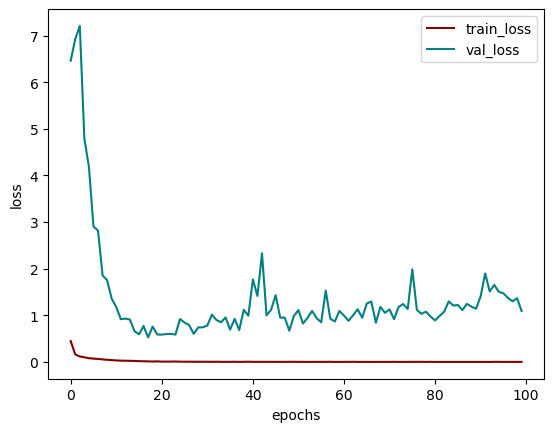

In [15]:
#绘制损失值曲线
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss', color='maroon')
plt.plot(range(epochs), val_loss, label='val_loss', color='teal')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig("LOSS_TRAIN_VAL_1.eps", format='eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


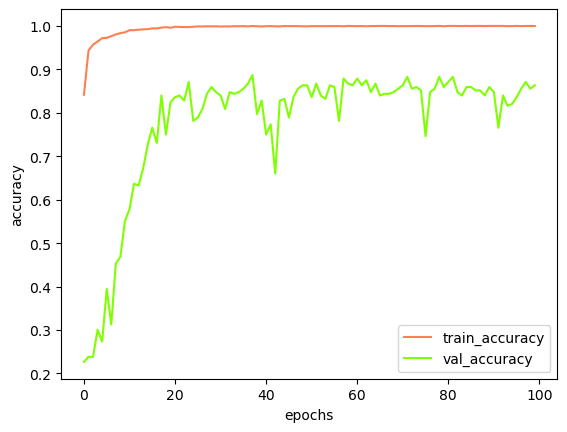

In [16]:
#绘制准确率曲线
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy', color='coral')
plt.plot(range(epochs), val_accuracy, label='val_accuracy', color='chartreuse')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig("ACC_TRAIN_VAL_1.eps", format='eps', dpi=300)
plt.show()

In [17]:
#曲线平滑处理
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #epochs = range(len(acc))
    '''
    plt.plot(epochs,
             smooth_curve(acc), 'bo', label='Smoothed training acc')
    plt.plot(epochs,
             smooth_curve(val_acc), 'b', label='Smoothed validation acc')
    '''
    plt.plot(smooth_curve(acc), color='coral', marker="D", label='acc')
    plt.plot(smooth_curve(val_acc), color='coral', label='val_acc')
    plt.legend()
    #plt.title('Training and validation accuracy')
    plt.savefig("accuracy_1.eps", format='eps', dpi=300)
    
    plt.figure()
    '''
    plt.plot(epochs,
             smooth_curve(loss), 'teal', label='Smoothed training loss')
    plt.plot(epochs,
             smooth_curve(val_loss), 'teal', label='Smoothed validation loss')
    '''
    plt.plot(smooth_curve(loss), color='maroon', marker = "D", label='loss')
    plt.plot(smooth_curve(val_loss), color='maroon', label='val_loss')
    plt.legend()
    #plt.title('Training and validation loss')
    plt.savefig("loss_1.eps", format='eps', dpi=300)

    
    plt.figure()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


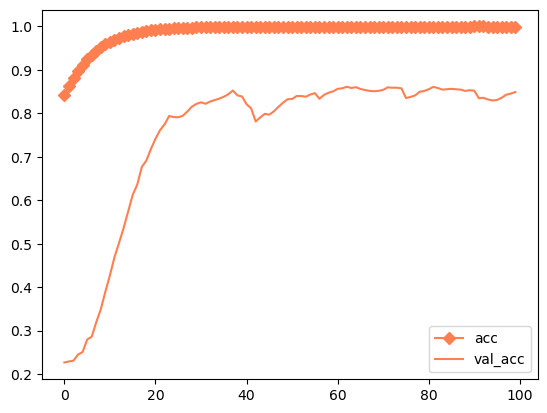

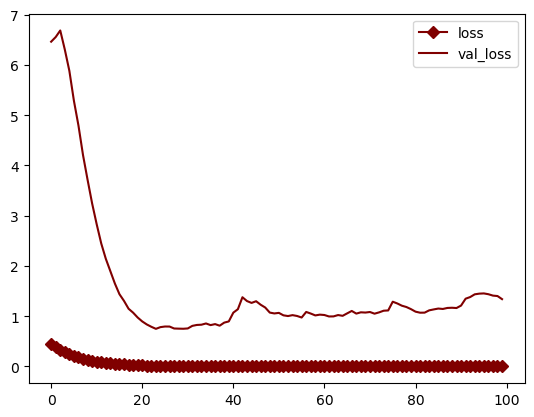

<Figure size 640x480 with 0 Axes>

In [18]:
plot_history(history)

In [19]:
#测试集测试效果评估
test_loss, test_acc = model.evaluate(test_data_gen)
print(test_loss,test_acc)


8/8 [==============================] - 6s 101ms/step - loss: 0.6413 - accuracy: 0.9206
0.6412776708602905 0.920634925365448


In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report      #分类报告
from sklearn.metrics import accuracy_score             #模型精度
import seaborn as sns

# 预测测试集数据整体准确率
Y_pred = model.predict(test_data_gen)
# 将预测的结果转化为one hot向量
Y_pred_classes = np.argmax(Y_pred, axis = 1)
#测试集分类报告输出
print('测试集分类报告：\n',classification_report(y_true = test_data_gen.classes,y_pred = Y_pred_classes,digits=4))

8/8 [==============================] - 1s 132ms/step
测试集分类报告：
               precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        36
           1     0.9437    0.9306    0.9371        72
           2     0.8873    0.8750    0.8811        72
           3     0.9167    0.9167    0.9167        72

    accuracy                         0.9206       252
   macro avg     0.9238    0.9306    0.9270       252
weighted avg     0.9204    0.9206    0.9204       252



In [2]:
import os,glob,random, csv,itertools
from sklearn.metrics import confusion_matrix

y_true = test_data_gen.classes  # 样本实际标签

 #下面三行代码为绘制混淆矩阵的传参
#predict_classes = model.predict(test_data_gen)#对测试数据集进行预测
#true_classes = np.argmax(predict_classes,1)#汲取预测结果
y_pred = model.predict_generator(test_data_gen)  # 样本预测标签
# 将预测的结果转化为one hot向量
Y_pred = np.argmax(y_pred, axis = 1)
# 3. 生成混淆矩阵
cm = confusion_matrix(y_true, Y_pred)

# 4. 将混淆矩阵转换为百分比
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save_flg=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm_percentage

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save_flg:
        plt.savefig("./confusion_matrix_1.eps", format='eps', dpi=300)
    plt.show()

# 获取类别名称
class_names = test_data_gen.class_indices.keys()

# 5. 绘制并保存混淆矩阵，设置normalize为True以显示百分比
plot_confusion_matrix(cm, classes=class_names, normalize=True, save_flg=True)

NameError: name 'test_data_gen' is not defined

C:\Users\Yuany\AppData\Local\Temp\ipykernel_15744\181704663.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data_gen)  # 样本预测标签


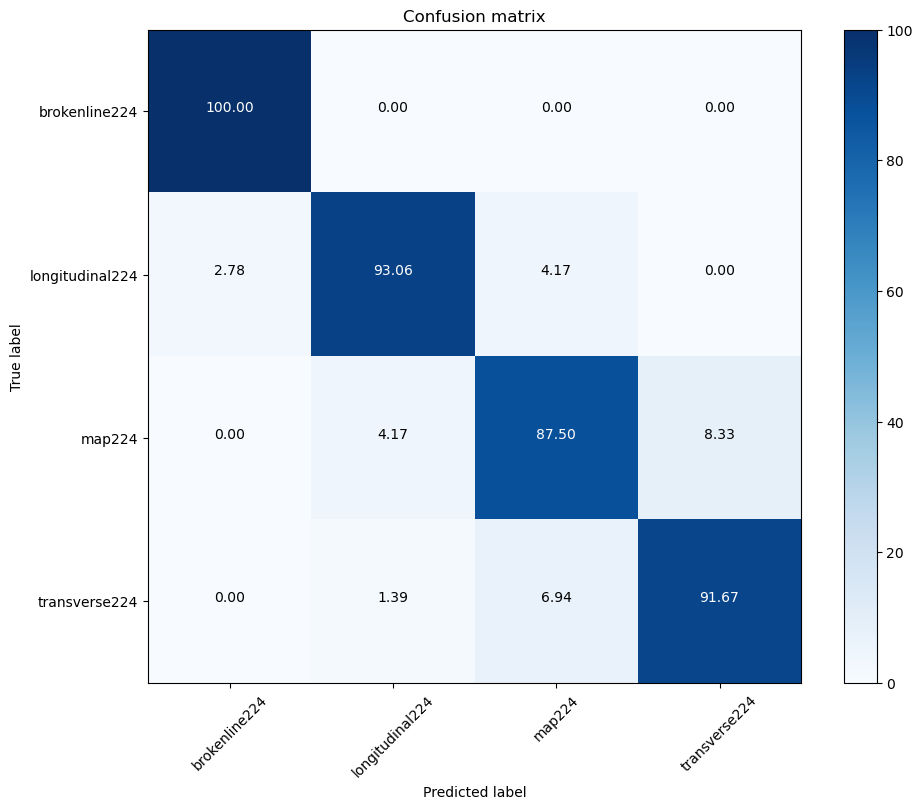

In [21]:
import os,glob,random, csv,itertools
from sklearn.metrics import confusion_matrix

y_true = test_data_gen.classes  # 样本实际标签

 #下面三行代码为绘制混淆矩阵的传参
#predict_classes = model.predict(test_data_gen)#对测试数据集进行预测
#true_classes = np.argmax(predict_classes,1)#汲取预测结果
y_pred = model.predict_generator(test_data_gen)  # 样本预测标签
# 将预测的结果转化为one hot向量
Y_pred = np.argmax(y_pred, axis = 1)
# 3. 生成混淆矩阵
cm = confusion_matrix(y_true, Y_pred)

# 4. 将混淆矩阵转换为百分比
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save_flg=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm_percentage

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save_flg:
        plt.savefig("./confusion_matrix_1.eps", format='eps', dpi=300)
    plt.show()

# 获取类别名称
class_names = test_data_gen.class_indices.keys()

# 5. 绘制并保存混淆矩阵，设置normalize为True以显示百分比
plot_confusion_matrix(cm, classes=class_names, normalize=True, save_flg=True)

In [17]:
#绘制多分类混淆矩阵
#参数 y_true为测试数据集的真实标签，y_pred为网络对测试数据集的预测结果
def plot_confusion_matrix(y_true, y_pred,
                          cmap = plt.cm.Reds, save_flg = False):
    classes = [str(i) for i in range(4)]#参数i的取值范围根据你自己数据集的划分类别来修改，我这儿为4代表数据集共有4类
    labels = range(4)#数据集的标签类别，跟上面I对应
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title, fontsize=18,fontname="Times New Roman")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # classes表示不同类别的名称，比如这有5个类别
    classes = ['BR', 'LC', 'MC', 'TC']
    plt.xticks(tick_marks, classes, fontsize=10,fontname="Times New Roman")
    plt.yticks(tick_marks, classes, fontsize=10,fontname="Times New Roman")
    print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontname="Times New Roman")
    plt.ylabel('True label', fontsize=14,fontname="Times New Roman")
    plt.xlabel('Predicted label', fontsize=14,fontname="Times New Roman")
    plt.savefig("./confusion_matrix_nn.png", dpi=720)
    plt.show()

C:\Users\Yuany\AppData\Local\Temp\ipykernel_8004\2067525869.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data_gen)  # 样本预测标签


Confusion matrix, without normalization


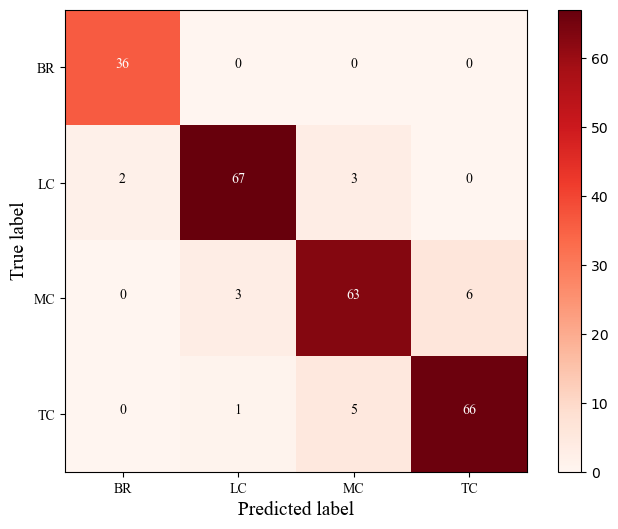

In [18]:
import os,glob,random, csv,itertools
from sklearn.metrics import confusion_matrix

y_true = test_data_gen.classes  # 样本实际标签

 #下面三行代码为绘制混淆矩阵的传参
#predict_classes = model.predict(test_data_gen)#对测试数据集进行预测
#true_classes = np.argmax(predict_classes,1)#汲取预测结果
y_pred = model.predict_generator(test_data_gen)  # 样本预测标签
# 将预测的结果转化为one hot向量
Y_pred = np.argmax(y_pred, axis = 1)

plot_confusion_matrix(y_true, Y_pred, save_flg = True)#调用混淆矩阵

8/8 [==============================] - 1s 155ms/step


C:\Users\Yuany\AppData\Local\Temp\ipykernel_8004\3739703756.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


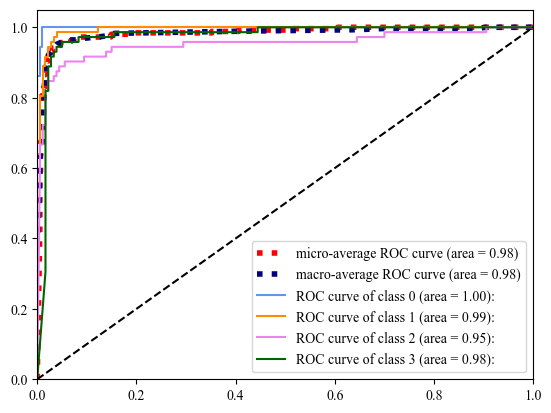

In [19]:
#### 绘制ROC和AUC曲线
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from scipy import interp
import matplotlib as mpl
from itertools import cycle
# 设置西文字体为新罗马字体
from matplotlib import rcParams

n_classes=4

# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict(test_data_gen)
# 将真实标签二值化
y_true = test_data_gen.classes  # 样本实际标签
#y_true = label_binarize(y_true, classes=['axles_2', 'axles_3', 'axles_4', 'axles_5+'])
# y_true = label_binarize(y_true, np.arange(n_classes))
y_true = label_binarize(y_true, classes=np.arange(n_classes))
# print(y_true)


# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=1.5
plt.figure()
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['cornflowerblue','darkorange', 'violet', 'darkgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ':'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate',fontname="Times New Roman")
#plt.ylabel('True Positive Rate',fontname="Times New Roman")
#plt.title('Test ROC and AUC',fontname="Times New Roman")
plt.legend(loc="lower right")
plt.savefig("ROC_AUC.png",dpi=720)
plt.show()

8/8 [==============================] - 1s 144ms/step


C:\Users\Yuany\AppData\Local\Temp\ipykernel_8004\4157432786.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


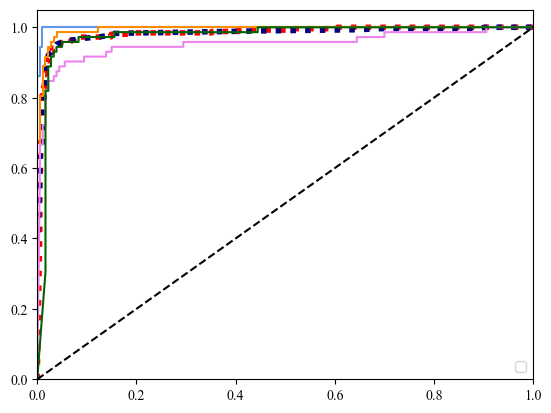

In [20]:
#绘制ROC和AUC曲线
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from scipy import interp
import matplotlib as mpl
from itertools import cycle
# 设置西文字体为新罗马字体
from matplotlib import rcParams

n_classes=4

# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict(test_data_gen)
# 将真实标签二值化
y_true = test_data_gen.classes  # 样本实际标签
#y_true = label_binarize(y_true, classes=['axles_2', 'axles_3', 'axles_4', 'axles_5+'])
y_true = label_binarize(y_true, classes=np.arange(n_classes))
# print(y_true)


# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=1.5
plt.figure()

plt.plot(fpr["micro"], tpr["micro"],
         color='red', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['cornflowerblue','darkorange', 'violet', 'darkgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate',fontname="Times New Roman")
#plt.ylabel('True Positive Rate',fontname="Times New Roman")
#plt.title('Test ROC and AUC',fontname="Times New Roman")
plt.legend(loc="lower right")
plt.savefig("ROC_AUC_no label.png",dpi=720)
plt.show()

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('MobileNetV2_model.tflite','wb') as fs:
    fs.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Yuany\AppData\Local\Temp\tmp2tp57bpg\assets


INFO:tensorflow:Assets written to: C:\Users\Yuany\AppData\Local\Temp\tmp2tp57bpg\assets
